Number of descriptors: (282, 128)

BoW Vector: [13.  9. 21. 13. 18. 15. 23.  6. 22. 12.  9. 11. 24. 15.  7. 18. 11. 14.
 16.  5.]


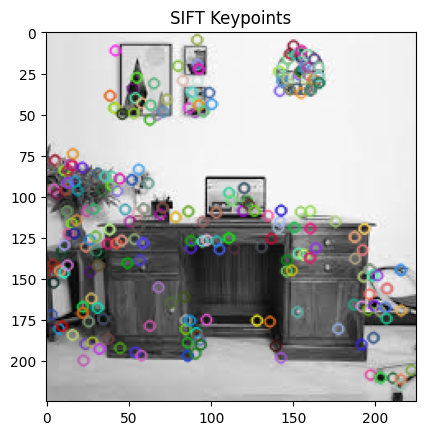

In [14]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

img_path = "/content/cv.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img, None)

print("Number of descriptors:", descriptors.shape)

k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(descriptors)

bow_hist = np.zeros(k)
cluster_result = kmeans.predict(descriptors)

for cid in cluster_result:
    bow_hist[cid] += 1

print("\nBoW Vector:", bow_hist)

img_kp = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(img_kp, cmap="gray")
plt.title("SIFT Keypoints")
plt.show()